# Przygotowanie danych

In [91]:
from sklearn import datasets

In [92]:
data_breast_cancer = datasets.load_breast_cancer(as_frame=True)
print(data_breast_cancer['DESCR'])


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [93]:
data_iris = datasets.load_iris(as_frame=True)
print(data_iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

# Klasyfikacja

## Podziel zbiór danych na uczący i testujący w proporcjach 80/20.

In [94]:
X = data_breast_cancer["data"][['mean area', 'mean smoothness']]
y = data_breast_cancer['target']

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

## Zbuduj modele klasyfikacji SVM dla średnich (mean) wartości cech area oraz smoothness, stwórz dwa modele

### LinearSVC, z funkcją straty “hinge”

In [96]:
from sklearn.svm import LinearSVC

svm_no_scale_clf = LinearSVC(C=1, loss="hinge")
svm_no_scale_clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\envs\untitled\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1, loss='hinge')

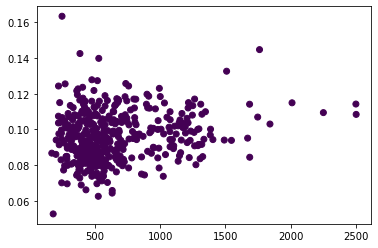

In [97]:
import matplotlib.pyplot as plt

plt.scatter(X_train['mean area'], X_train['mean smoothness'], c=svm_no_scale_clf.predict(X_train))

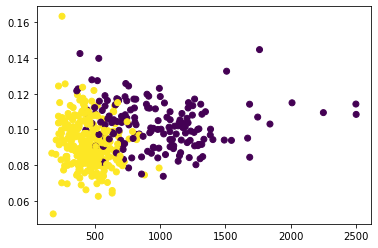

In [98]:
plt.scatter(X_train['mean area'], X_train['mean smoothness'], c=y_train)

### LinearSVC, z funkcją straty “hinge”, po uprzednim automatycznym skalowaniu wartości cech

In [99]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

svm_with_scale_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1,
                             loss="hinge",
                             random_state=42))])
svm_with_scale_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

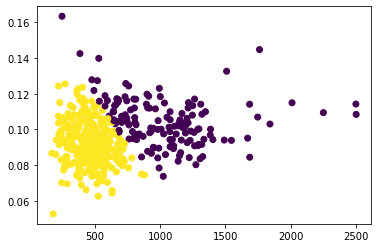

In [100]:
plt.scatter(X_train['mean area'], X_train['mean smoothness'], c=svm_with_scale_clf.predict(X_train))

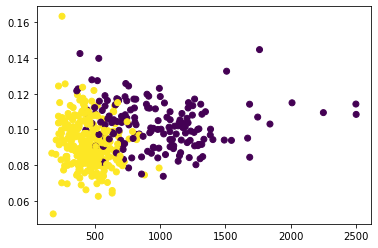

In [101]:
plt.scatter(X_train['mean area'], X_train['mean smoothness'], c=y_train)

## Policz dokładność (accuracy) dla ww. klasyfikacji osobno na zbiorze uczącym i testującym, zapisz wartości na liście w kolejności: zbiór uczący bez skalowania, zbiór testujący bez skalowania, zbiór uczący ze skalowanie, zbiór testujący ze skalowaniem. Listę zapisz w pliku Pickle bc_acc.pkl

In [102]:
score_no_scale_train = svm_no_scale_clf.score(X_train, y_train)
score_no_scale_test = svm_no_scale_clf.score(X_test, y_test)
score_scale_train = svm_with_scale_clf.score(X_train, y_train)
score_scale_test = svm_with_scale_clf.score(X_test, y_test)
accuracy = [score_no_scale_train, score_no_scale_test, score_scale_train, score_scale_test]
accuracy

[0.6285714285714286,
 0.6228070175438597,
 0.8923076923076924,
 0.9298245614035088]

In [103]:
import pickle

with open('bc_acc.pkl', 'wb') as file:
    pickle.dump(accuracy, file)

In [104]:
with open('bc_acc.pkl', 'rb') as file:
    print(pickle.load(file))

[0.6285714285714286, 0.6228070175438597, 0.8923076923076924, 0.9298245614035088]


# Przygotowanie danych

In [105]:
import numpy as np

X = data_iris["data"][['petal length (cm)', 'petal width (cm)']]
y = (data_iris["target"] == 2).astype(np.uint8)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Klasyfikacja

### Zbuduj modele klasyfikacji SVM dla cech  długość i szerokość płatka.

### LinearSVC, z funkcją straty “hinge”

In [107]:
svm_no_scale_clf = LinearSVC(C=1, loss="hinge")
svm_no_scale_clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\envs\untitled\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1, loss='hinge')

### LinearSVC, z funkcją straty “hinge”, po uprzednim automatycznym skalowaniu wartości cech

In [108]:
svm_with_scale_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1,
                             loss="hinge",
                             random_state=42))])
svm_with_scale_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

### Policz dokładność (accuracy) dla w/w klasyfikacji osobno na zbiorze uczącym i testującym, zapisz wartości na liście w kolejności: zbiór uczący bez skalowania, zbiór testujący bez skalowania, zbiór uczący ze skalowanie, zbiór testujący ze skalowaniem. W.w. listę zapisz w pliku Pickle iris_acc.pkl.

In [109]:
score_no_scale_train = svm_no_scale_clf.score(X_train, y_train)
score_no_scale_test = svm_no_scale_clf.score(X_test, y_test)
score_scale_train = svm_with_scale_clf.score(X_train, y_train)
score_scale_test = svm_with_scale_clf.score(X_test, y_test)
accuracy = [score_no_scale_train, score_no_scale_test, score_scale_train, score_scale_test]
accuracy

[0.9416666666666667, 1.0, 0.9416666666666667, 1.0]

In [110]:
with open('iris_acc.pkl', 'wb') as file:
    pickle.dump(accuracy, file)

In [111]:
with open('iris_acc.pkl', 'rb') as file:
    print(pickle.load(file))

[0.9416666666666667, 1.0, 0.9416666666666667, 1.0]
